---

## K-Nearest Neighbors (KNN) Algorithm and Applications
#### Language: Python 3.8.8
#### Author: Tianjian Sun

---


### Introduction
In this section we focus on a simple and straight-forward machine learning model, k-nearest neighbors (KNN). 

KNN is a non-parametric supervised model, and its main idea is to classify or regress by compute the k closest training examples in the data set. 



### Algorithm
*k* is a pre-defined constant, and for
* classification tasks.
An unlabeled data point is classified by assigning the label which is most frequent among the *k* training samples nearest to that query point.

* regression tasks.
An unlabeled data point is predicted by averaging the values among the k training samples nearest to that query point. 

More formally, k-nearest-neighbor methods use those observations in the training set $T$ closest in input space to x to form $\hat{y}$. Specifically, the k-nearest neighbor fit for $\hat{y}$ is defined as follows:

$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x)}{x_i}$$

where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample. Closeness implies a metric, which for the moment Euclidean distance is the most commonly-used distance. So, in words, we find the k observations with $x_i$ closest to $x$ in input space, and average their responses. 

For classification problems, labels are binary coded so $\hat{y}$ is the proportion of the class of '1', and it represents a majority vote in the neighborhood. For regression problems, labels are numeric so $\hat{y}$ is the average of neighborhoods.

Euclidean distance, which is the most commonly-used distance to calculate the distance between data points, is defined as follows:

$$ d(\boldsymbol{x}_i, \boldsymbol{x}_j) = \sqrt{\sum_{k=1}^{p} {(\boldsymbol{x}_{ik}-\boldsymbol{x}_{jk})^2}}  $$

where $\boldsymbol{x}_i$, $\boldsymbol{x}_j$ are two $1 \times p$ data point vectors.

Notice that the neighbors are taken from known data set, it can be thought of as the training data set for the algorithm, but in fact no explicit training step is required.


### Illustration 

Take a look at the two-dimension space, we can have a intuitive idea about how knn works. The following figure by Navlani ([link](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)) clearly illustrates the algorithm of knn. 

Given the samples and the new data point in the sample space, distances between the new example data point and all other points are calculated and ranked ascending. Then the first $k$ samples are picked up, and a majority vote (for classification) or an average (for regression) is taken among the top $k$ samples to predict label of the new example.

![knn_illu](images/knn_illu.png "ShowMyImage")

### Advantages and Disadvantages

Advantages:

* No training period. As discussed before, knn does not have a training period. This kind of learning model is called lazy learner (Instance based learning), which uses sample data set directly to make real-time predictions based on some algorithms. Thus knn is faster than some other algorithms which require training period (who are called eager learners).

* Supper simple. Knn is a very simple model which requires less computational resource, and it's eazy to implement. Also only two hyper-parameters, number of neighbors $k$ and distance function are required to be determined befor implying the algorithm.

* No assumptions needed. Knn requires no assumption on data distribution or other properties.

Disadvantages:

* Poor with large dataset. Computationally expensive when calculation the distances among all samples if the number of data is huge. 

* Poor with high dimensions. When number of dimension is high, it's hard for knn to represent the relative space relationship between data points, as data points become supper sparse. Also scales of different dimensions can largely affect the distances between points, so feature scaling must be down before using knn. Moreover, it's also computationally expensive to calculate the distances.

* Outlier, noise and missing value sensitivity. KNN is sensitive to noise and outliers in the dataset, and it cannot deal with missing values.


### Hard code of KNN classifier and regressor

In [1]:
# import necessary packages
import numpy as np
from collections import Counter
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# function of knn
def knn_classifier_and_regressor(train_input, train_output, new_point, k, classifier=True):
    '''
    A knn classifier and regressor.
    
    Input:
        train_input: ndarray, a n*p matrix, which is the features of training data set.
        train_output: ndarray, a n*1 matrix, which is the output (either a class or a value) of training data set.
        new_point: ndarray, a 1*p matrix, which is the input of a new data.
        k: int, number of neighbors.
        classifier: an indicator of classifier and regressor. Default is True.
    
    Output:
        knn_result: int or float, the result of knn prediction.
    '''
    
    n = train_input.shape[0]
    distance = np.zeros(n)
    
    for i in range(n):
        distance[i] = np.linalg.norm(train_input[i,:] - new_point)
    
    top_k_neighbors = np.argsort(distance)[:k]
    k_neighbor_output = train_output[top_k_neighbors]
    
    # for classifier
    if classifier:
        voters = Counter(k_neighbor_output)
        knn_result = voters.most_common(1)[0][0]
    
    # for regressor
    else:
        knn_result = np.mean(k_neighbor_output)
    
    return knn_result

---

### Applications on data sets

First we apply our code on a classification problem. We test KNN on the wine data set from *sklearn.datasets*

---

In [3]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

Let's have an overview of our dataset. There're 13 features in the wine dataset. There's no missing value, and the features are all positive and have different ranges.

In [4]:
print(pd.DataFrame(X).describe())

               0           1           2           3           4           5   \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

               6           7           8           9           10          11  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.029270    0.361854    1.590899    5.058090    0.957449    2.611685   
std      0.998859    0.1244

Let's see how many types of wines are in the data set and how many sample are in each type of wines. From the following result, there're 3 types, and their numbers are 59, 71 and 71.

In [5]:
print(Counter(y))

Counter({1: 71, 0: 59, 2: 48})


Here we visualize the first and second features to see if there's any visible clusters among three different wines.

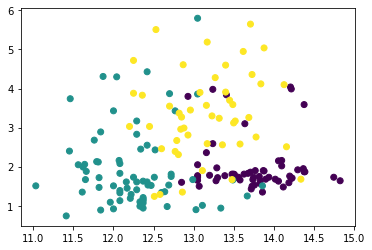

In [6]:
plt.scatter(X[:, 0], X[:,1],c=y)
plt.show()

Seems that there're three clusters in the figure, but their boundaries are not clear. Let's try our KNN model to predict new labels. 

Notice that there're 3 types of wines, we do a stratified sampling to make sure the ratios of types of wines are the same between training and test data set.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
accuracy_rate

0.8703703703703703

Emmmmm, a good predictive accuracy.

Let's try to add one more features in our model.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:3], y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
accuracy_rate

0.8888888888888888

The predictive accuracy increases a little. Let's use all features.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
accuracy_rate

0.6851851851851852

Looks like using all features won't increase the accuracy.

Notice that the ranges of different features vary, so some features may have a large impact during calculating the distance as Euclidean distance is sensitive to magnitudes. Let's scale them to 0 mean and 1 variance.

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Let's apply the scaled data again. First we use the first two features.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, 0:2], y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
accuracy_rate

0.8518518518518519

Emmm, the result decreases a little. Let's use the first three features.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, 0:3], y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
accuracy_rate

0.8703703703703703

The result is still similar! Let's use all features.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
accuracy_rate

0.9814814814814815

Jesus, the accuracy is amazing! The performance improves a lot compared with the non-scaled version, which is 0.685. And we also notice that using more features cn improve our prediction in this case. Scaling dataset is crucial.

Second we apply our code on a regression problem. We test KNN on the boston housing data set from *sklearn.datasets*

In [14]:
bo_housing= datasets.load_boston()
X = bo_housing.data
y = bo_housing.target

Let's have an overview of our dataset. There're 13 features in the wine dataset. There's no missing value, and the features are all positive and have different ranges.

In [15]:
print(pd.DataFrame(X).describe())

               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

We visualize the first feature and the price to see if there's any trend between them. It looks like there's a shape of $y=1/x$ trend, perhaps.

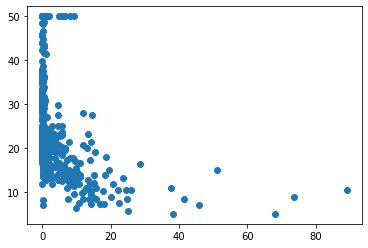

In [16]:
plt.scatter(X[:, 0], y)
plt.show()

First we scale the boston housing data to 0-mean and 1-variance.

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Lets try our KNN model to predict prices using the first two features.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:,0:2], y, test_size=0.2)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=False)
              for new_point in X_test]
MSE = sum([(predictions[i]-y_test[i])**2 for i in range(len(y_test))])/len(y_test)
MSE

57.99099607843138

In [19]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, predictions)
R2

0.3529766879535934

Really a bad prediction! Let's try all features.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=False)
              for new_point in X_test]
MSE = sum([(predictions[i]-y_test[i])**2 for i in range(len(y_test))])/len(y_test)
MSE

28.58198431372545

In [21]:
R2 = r2_score(y_test, predictions)
R2

0.7303044267129786

A poor result but not that bad! In this case KNN is not an ideal model to do regression.

## How can k impact prediction result

$k$ is pre-defined before learning, and let's see how it can affect the model prediction.

Let's use the wine data set again. We compute the accuracy using k in the range from 1 to the training set size.

In [22]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=24, stratify=y)

n_train = X_train.shape[0]

In [24]:
accuracy_list = []
for k in range(1, n_train+1):
    predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=k,
                                          classifier=True)
              for new_point in X_test]

    accuracy_rate = np.sum(predictions==y_test)/len(y_test)
    accuracy_list.append(accuracy_rate)

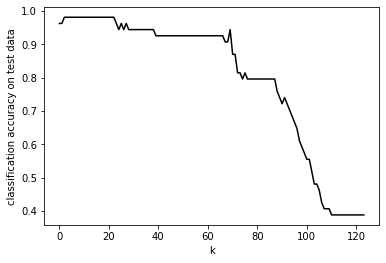

In [25]:
plt.plot(accuracy_list,c='k')
plt.xlabel('k')
plt.ylabel('classification accuracy on test data')
plt.show()

From the figure, the accuracy is the highest when *k* is less than 20, then the accuracy drops as *k* increases.

Note that the model complexity increases as *k* decreases, then $k=20$ can be a good choice in this case.